# Rock Papper Scissors

### Model
dataset from http://www.laurencemoroney.com/rock-paper-scissors-dataset/

#### Extracting the data files

In [1]:
import os
import zipfile

In [2]:
training_data_zip = 'data/rps.zip'
zip_ref = zipfile.ZipFile(training_data_zip,'r')
zip_ref.extractall('data/')
zip_ref.close()

In [3]:
testing_data_zip = 'data/rps-test-set.zip'
zip_ref = zipfile.ZipFile(testing_data_zip,'r')
zip_ref.extractall('data/')
zip_ref.close()

In [4]:
validating_data_zip = 'data/rps-validation.zip'
zip_ref = zipfile.ZipFile(validating_data_zip,'r')
zip_ref.extractall('data/rps-validation/')
zip_ref.close()

#### Loading the training data

In [5]:
from keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = 'data/rps/'
training_datagen = ImageDataGenerator(rescale = 1./255)

Using TensorFlow backend.


In [6]:
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,target_size=(150,150),class_mode='categorical'
)

Found 2520 images belonging to 3 classes.


In [7]:
TESTING_DIR = 'data/rps-test-set/'
testing_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
testing_generator = testing_datagen.flow_from_directory(
    TESTING_DIR, target_size=(150,150),class_mode='categorical'
)

Found 372 images belonging to 3 classes.


#### Building the model

In [9]:
import tensorflow as tf

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hiden layer
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [11]:
model.compile(loss = 'categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [12]:
history = model.fit_generator(train_generator,epochs=25,validation_data=testing_generator, verbose=1)

Epoch 1/25
79/79 [==============================] - 112s 1s/step - loss: 0.5982 - acc: 0.7393 - val_loss: 0.7103 - val_acc: 0.7043
Epoch 2/25
79/79 [==============================] - 106s 1s/step - loss: 0.0642 - acc: 0.9798 - val_loss: 0.4629 - val_acc: 0.8602
Epoch 3/25
79/79 [==============================] - 121s 2s/step - loss: 0.0171 - acc: 0.9960 - val_loss: 0.5948 - val_acc: 0.8683
Epoch 4/25
79/79 [==============================] - 111s 1s/step - loss: 0.0172 - acc: 0.9956 - val_loss: 0.6328 - val_acc: 0.8790
Epoch 5/25
79/79 [==============================] - 102s 1s/step - loss: 0.0536 - acc: 0.9913 - val_loss: 1.1686 - val_acc: 0.8710
Epoch 6/25
79/79 [==============================] - 109s 1s/step - loss: 0.0507 - acc: 0.9925 - val_loss: 0.9368 - val_acc: 0.8978
Epoch 7/25
79/79 [==============================] - 108s 1s/step - loss: 0.0057 - acc: 0.9984 - val_loss: 0.9853 - val_acc: 0.8656
Epoch 8/25
79/79 [==============================] - 124s 2s/step - loss: 0.0019 - a

In [15]:
import matplotlib.pyplot as plt

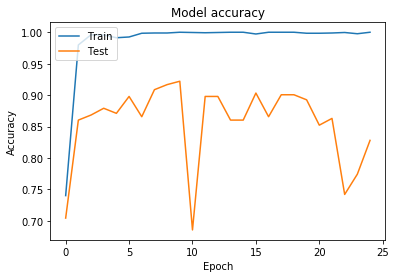

In [16]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### Saving the model

In [55]:
model.save_weights("firstmodel.h5")

#### Avoiding Overfitting

##### image augmentation

In [17]:
from PIL import Image
from PIL import Image as pil_image
from PIL import ImageDraw

In [11]:
augs_gen = ImageDataGenerator(
    rescale=1./255,        
    horizontal_flip=True,
    height_shift_range=.2,
    vertical_flip = True,
    validation_split = 0.2
)

train_gen = augs_gen.flow_from_directory(
    TRAINING_DIR,
    target_size = (150,150),
    batch_size=32,
    class_mode = 'categorical',
    shuffle=True,
)

val_gen = augs_gen.flow_from_directory(
    TESTING_DIR,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    subset = 'validation'
)

Found 2520 images belonging to 3 classes.
Found 72 images belonging to 3 classes.


In [12]:
model.compile(loss = 'binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
history2 = model.fit_generator(
        train_gen,
        steps_per_epoch=50,
        epochs=10,
        validation_data=val_gen,
        validation_steps=50,
        verbose=1)

#model.fit_generator(
# train_generator,epochs=25,validation_data=testing_generator, verbose=1)

Epoch 1/10
50/50 [==============================] - 85s 2s/step - loss: 0.5867 - acc: 0.6965 - val_loss: 0.5744 - val_acc: 0.6790
Epoch 2/10
50/50 [==============================] - 85s 2s/step - loss: 0.4143 - acc: 0.8083 - val_loss: 0.3883 - val_acc: 0.7804
Epoch 3/10
50/50 [==============================] - 84s 2s/step - loss: 0.2176 - acc: 0.9209 - val_loss: 0.2997 - val_acc: 0.8632
Epoch 4/10
50/50 [==============================] - 86s 2s/step - loss: 0.1407 - acc: 0.9506 - val_loss: 0.1776 - val_acc: 0.9213
Epoch 5/10
50/50 [==============================] - 88s 2s/step - loss: 0.1153 - acc: 0.9615 - val_loss: 0.0808 - val_acc: 0.9808
Epoch 6/10
50/50 [==============================] - 80s 2s/step - loss: 0.0939 - acc: 0.9669 - val_loss: 0.1110 - val_acc: 0.9507
Epoch 7/10
50/50 [==============================] - 86s 2s/step - loss: 0.0698 - acc: 0.9758 - val_loss: 0.1056 - val_acc: 0.9589
Epoch 8/10
50/50 [==============================] - 80s 2s/step - loss: 0.0592 - acc: 0.97

In [14]:
model.save_weights("secondmodel.h5")

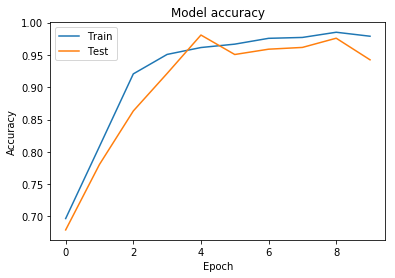

In [16]:
# Plot training & validation accuracy values
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [23]:
from keras.preprocessing import image
import numpy as np

In [29]:
def print_prediction(values,names):
    for i in range(3):
        if values[i] > 0:
            print(names[i])
            break

In [31]:
names = ['paper', 'rock', 'scissors']

In [37]:
img_width, img_height = 150, 150
img = image.load_img('data/rps-validation/scissors-hires1.png',target_size=(img_width,img_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
values = model.predict(img)

In [38]:
print_prediction(values[0],names)

scissors
